<a href="https://colab.research.google.com/github/t-perniola/IPCV-assignments/blob/main/assignment_module_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/LabSessionsIPCV/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  dataset.zip
replace __MACOSX/._dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._dataset      
  inflating: __MACOSX/dataset/._scenes  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
  inflating: __MACOSX/dataset/._models  
  inflating: dataset/scenes/scene12.png  
  inflating: __MACOSX/dataset/scenes/._scene12.png  
  inflating: dataset/scenes/scene10.png  
  inflating: __MACOSX/dataset/scenes/._scene10.png  
  inflating: dataset/scenes/scene11.png  
  inflating: __MACOSX/dataset/scenes/._scene11.png  
  inflating: dataset/scenes/scene5.png  
  inflating: __MACOSX/dataset/scenes/._scene5.png  
  inflating: dataset/scenes/scene4.png  
  inflating: __MACOSX/dataset/scenes/._scene4.png  
  inflating: dataset/scenes/scene6.png  
  inflating: __MACOSX/dataset/scenes/._scene6.png  
  inflating: da

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.



---



# Solutions

In [3]:
# Import useful libraries
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [4]:
# change directory
os.chdir("dataset")

only for testing purposes: where each product in each ref image is actually present in the scenes images

single instance detection:
* ref1: scene1/scene4
* ref2: scene1
* ref3: scene2
* ref4: scene2
* ref5: scene2
* ref6: scene3
* ref7: scene3
* ref8: scene3/scene4
* ref9: scene4
* ref10: scene4
* ref11: scene5
* ref12: scene5
* ref13: /
* ref14: /

multiple instances detection:
* ref15: scene6 x2
* ref16: scene7 x2
* ref17 and ref23 are the same image: scene8 x2/scene11 x2
* ref18: scene9 x2/scene12 x2
* ref19: scene9 x2
* ref20: scene9 x2
* ref21: scene10 x2
* ref22: scene10 x2
* ref24: scene8 x1/scene11 x2
* ref25: scene11 x3
* ref26: scene8 x1/scene12 x2
* ref27: scene12 x2






## Track A

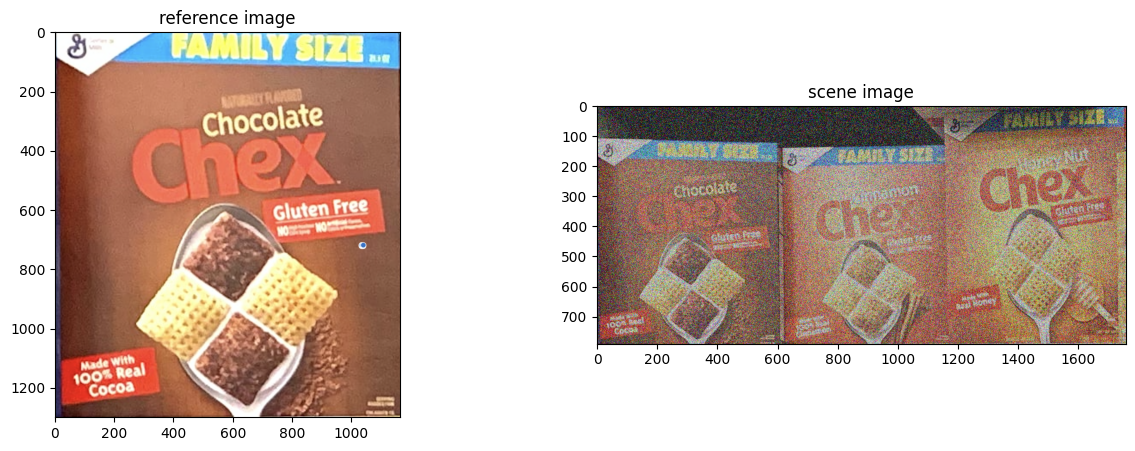

In [9]:
# @title Read and show two samples images, a reference image and a scene image
ref = cv2.imread("models/ref6.png", cv2.IMREAD_COLOR) # or set flag 1
ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB) # convert to RGB format
scene = cv2.imread("scenes/scene3.png", 1)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(ref_color)
ax[0].set_title("reference image")
ax[1].imshow(scene_color)
ax[1].set_title("scene image")
plt.show()

We notice that all of these images are **colored** images, thus they have 3 channels associated with, one for each color.

Since SIFT works more efficeintly with grayscale images, which have only one channel and it can lead to faster computation compared to color images with multiple channels, **we convert** our colored images into **grayscale** images.

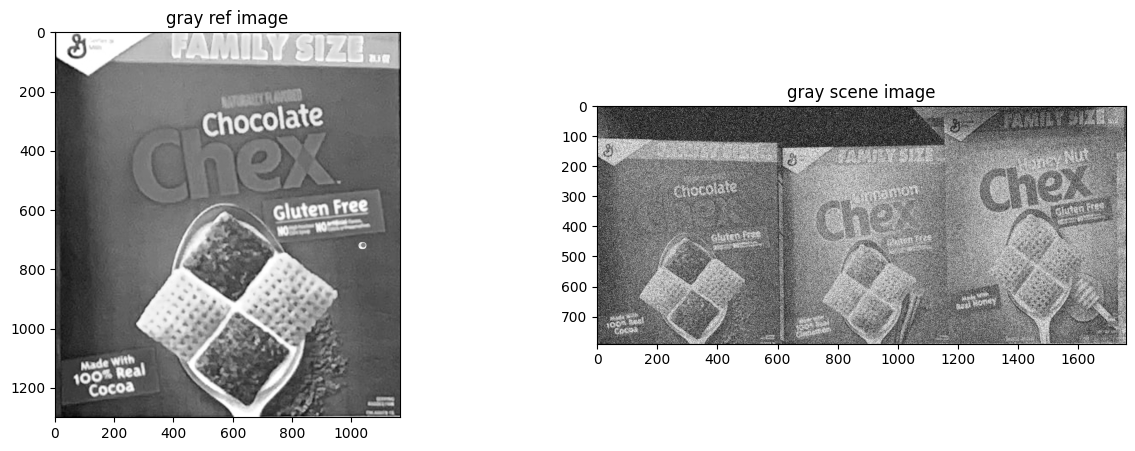

In [10]:
# @title Conversion to grayscale
ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)
gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(ref, cmap = "gray")
ax[0].set_title("gray ref image")
ax[1].imshow(gray_scene, cmap = "gray")
ax[1].set_title("gray scene image")
plt.show()

### Denoising images
We can clearly see that scene images are corrupted by **noise**.
In order to design our denoising process in a reasonable way, we have to consider two pivotal facts:

1. **Preserving edges**: since our task is an Instance-detection task, preserving edges is crucial.
2. **Gaussian nature of the noise**: we notice that our images are mainly corrupted by Gaussian noise.

Since we can preserve edges by only using **non-linear filters**, we need to include one of them in our denoising process. Even though linear filters (e.g. Gaussian filter) can effectively reduce noise, they blurs the image.

Therefore we will try different combinations of linear and non-linear filters to accomplish this denoising task in the most efficient way.

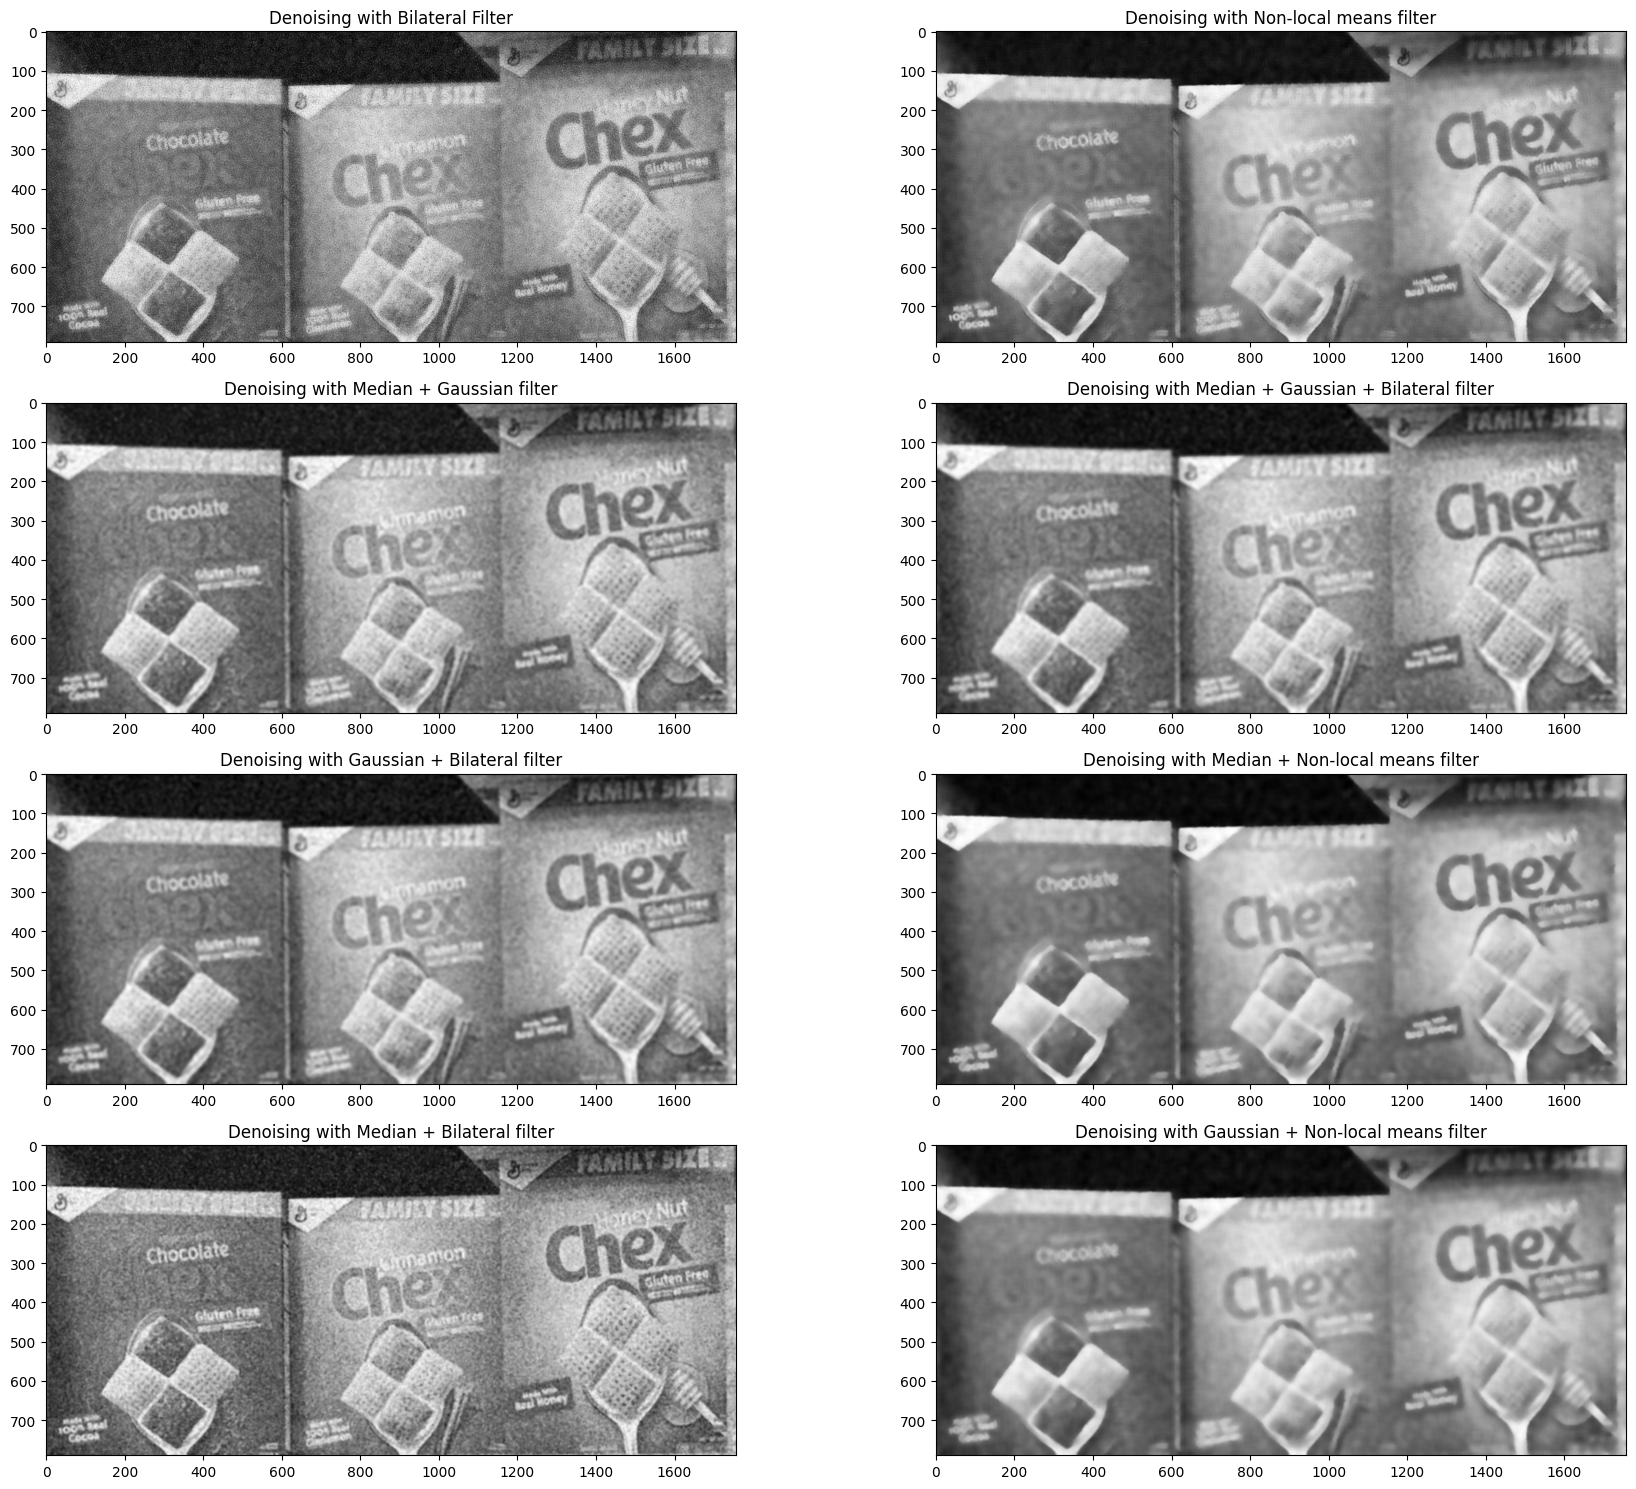

In [11]:
#@title Different combinations of filters
fig, ax = plt.subplots(4, 2, figsize=(20,15))

'''
# Plot single image in the first row, spanning across both columns
ax_top = plt.subplot2grid((5, 2), (0, 0), colspan=2);
ax_top.imshow(gray_scene, cmap="gray")
ax_top.set_title("Original noisy image")
ax_top = ax[0, 1]
ax_top.axis('off')
'''

sigma = 2
k_size = int(2*(3*sigma) + 1)

ax[0,0].set_title("Denoising with Bilateral Filter")
# sigmaColor controls the color space filtering: in particular, controls the degree to which pixels with similar intensity values are considered for smoothing
# sigmaSpace controls the spatial filtering: it specifies how far from the central pixel the filter will consider neighboring pixels.
denoised_bf = cv2.bilateralFilter(gray_scene, d = 20, sigmaColor=75, sigmaSpace=75)
ax[0,0].imshow(denoised_bf, cmap="gray")

ax[0,1].set_title("Denoising with Non-local means filter")
denoised_nlf = cv2.fastNlMeansDenoising(gray_scene, None, h=50, templateWindowSize=7, searchWindowSize=21)
ax[0,1].imshow(denoised_nlf, cmap="gray")

ax[1,0].set_title("Denoising with Median + Gaussian filter")
# We have to apply the median filter before, otherwise I will spread the impulse noise on the whole image
denoised_mgf = cv2.GaussianBlur(cv2.medianBlur(gray_scene, ksize=9), (k_size, k_size), sigma)
ax[1,0].imshow(denoised_mgf, cmap="gray")

ax[1,1].set_title("Denoising with Median + Gaussian + Bilateral filter")
denoised_ggf = cv2.bilateralFilter(cv2.GaussianBlur(cv2.medianBlur(gray_scene, ksize=7), (k_size, k_size), sigma), d = 12, sigmaColor=75, sigmaSpace=75)
ax[1,1].imshow(denoised_ggf, cmap="gray")

ax[2,0].set_title("Denoising with Gaussian + Bilateral filter")
denoised_gbf = cv2.bilateralFilter(cv2.GaussianBlur(gray_scene, (k_size, k_size), sigma), d = 12, sigmaColor=75, sigmaSpace=75)
ax[2,0].imshow(denoised_gbf, cmap="gray")

ax[2,1].set_title("Denoising with Median + Non-local means filter")
denoised_mnf = cv2.fastNlMeansDenoising(cv2.medianBlur(gray_scene, ksize=7), None, h=50, templateWindowSize=7, searchWindowSize=21)
ax[2,1].imshow(denoised_mnf, cmap="gray")

ax[3,0].set_title("Denoising with Median + Bilateral filter")
# We have to apply the median filter before, otherwise I will spread the impulse noise on the whole image
denoised_mbf = cv2.bilateralFilter(cv2.medianBlur(gray_scene, ksize=5), d = 7, sigmaColor=75, sigmaSpace=75)
ax[3,0].imshow(denoised_mbf, cmap="gray")

ax[3,1].set_title("Denoising with Gaussian + Non-local means filter")
# We have to apply the median filter before, otherwise I will spread the impulse noise on the whole image
denoised_gnf = cv2.fastNlMeansDenoising(cv2.GaussianBlur(gray_scene, (k_size, k_size), sigma),  None, h=50, templateWindowSize=7, searchWindowSize=21)
ax[3,1].imshow(denoised_gnf, cmap="gray")

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.5)
plt.tight_layout()
plt.show()

> As we can see, applying just a linear filter (or a combination of them) results in blurred edges, a situation that we want firmly to avoid.


Let's compare which denoising process actually performs the best by visualizing the extracted keypoints using the SIFT descriptor for each denoised image with a different filter.

KeyboardInterrupt: 

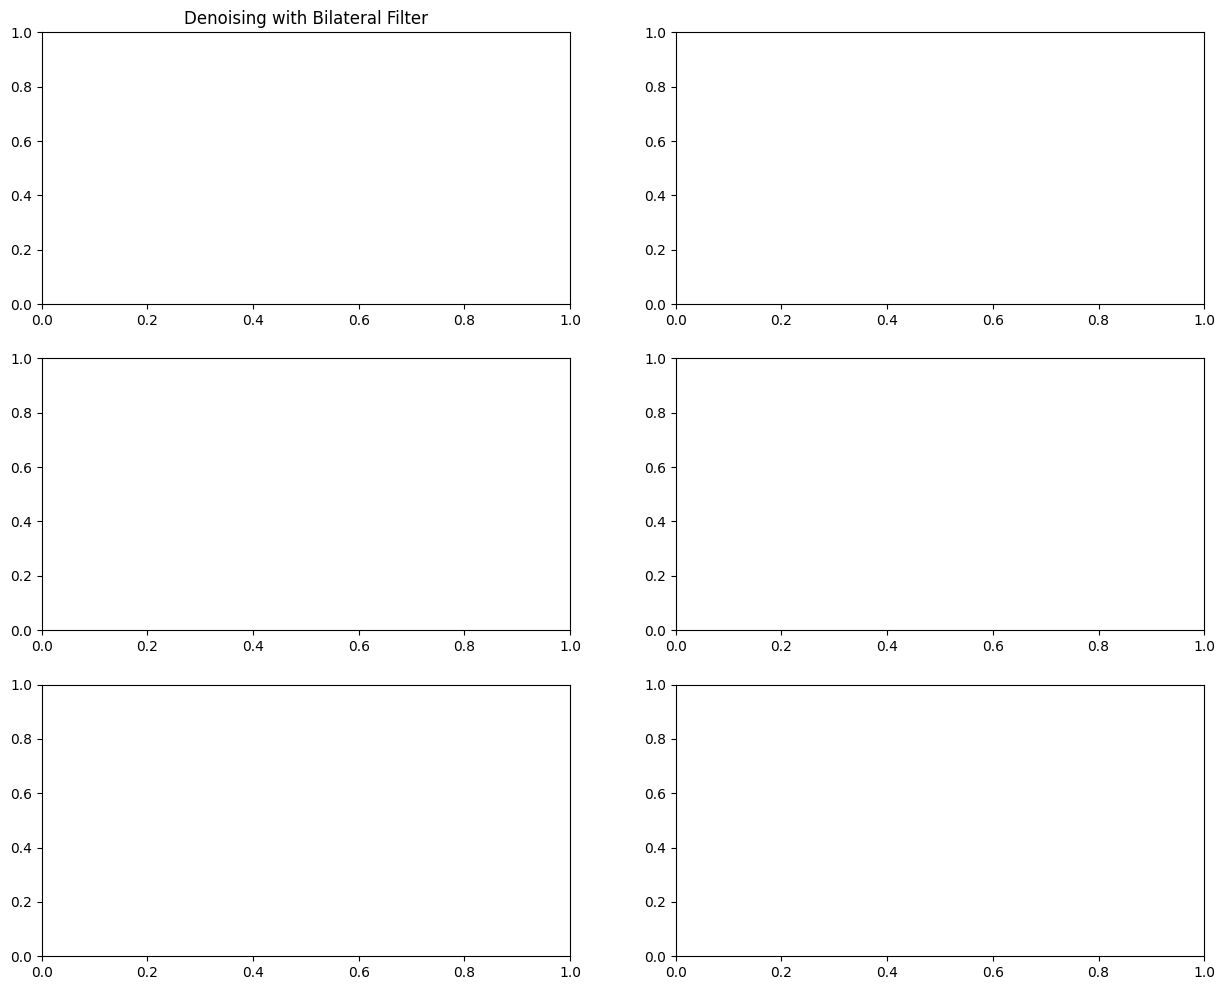

In [12]:
#@title Visualizing keypoints for each combination of filters
fig, ax = plt.subplots(3, 2, figsize=(15,12))

sigma = 3
k_size = int(2*(3*sigma) + 1)

ax[0,0].set_title("Denoising with Bilateral Filter")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_bf)
ax[0,0].imshow(image_with_kp, cmap="gray")

ax[0,1].set_title("Denoising with Non-local means filter")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_nlf)
ax[0,1].imshow(image_with_kp, cmap="gray")

ax[1,0].set_title("Denoising with Median + Gaussian filters")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_mgf)
ax[1,0].imshow(image_with_kp, cmap="gray")

ax[1,1].set_title("Denoising with two Gaussian filters")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_ggf)
ax[1,1].imshow(image_with_kp, cmap="gray")

ax[2,0].set_title("Denoising with Gaussian + Bilateral filters")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_gbf)
ax[2,0].imshow(image_with_kp, cmap="gray")

ax[2,1].set_title("Denoising with Median + Non-local means filters")
kp_image, des_image, image_with_kp = sift_detect_and_visualize(denoised_mnf)
ax[2,1].imshow(image_with_kp, cmap="gray")

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.5)
plt.tight_layout()
plt.show()

> As a matter of fact, noise smoothing is essential because computing descriptors for a noisy image can lead to the detection of numerous irrelevant keypoints. In fact, the image below illustrates this point clearly:

In [ ]:
#@title Detect keypoints for the noisy scene
kp_noisy_scene = sift.detect(gray_scene)

# Describing keypoints for reference and scene images
kp_noisy_scene, _ = sift.compute(gray_scene, kp_noisy_scene)

# Visualize keypoints
noisy_scene_with_kp = cv2.drawKeypoints(gray_scene, kp_noisy_scene, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15,5))
plt.title("Visualizing keypoints for the grayscale noisy scene")
plt.imshow(noisy_scene_with_kp)
plt.show()

>> As we can see, the SIFT detector has found several irrelevant keypoints, due to the annoying presence of noise.

---

In [ ]:
# @title Read and show two samples images, a reference image and a scene image
ref = cv2.imread("models/ref9.png", cv2.IMREAD_COLOR) # or set flag 1
ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB) # convert to RGB format
scene = cv2.imread("scenes/scene4.png", 1)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

# conversion to grayscale
ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)
gray_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(ref_color)
ax[0].set_title("reference image")
ax[1].imshow(scene_color)
ax[1].set_title("scene image")
plt.show()

In [ ]:
# @title Denoise function
def denoise_image(noisy_img):
  return cv2.bilateralFilter(cv2.medianBlur(noisy_img, ksize=5), d = 7, sigmaColor=75, sigmaSpace=75)

In [ ]:
# @title Computing keypoints through SIFT descriptor
sift = cv2.xfeatures2d.SIFT_create()

def sift_detect_and_visualize(image):
  kp_image, des_image = sift.detectAndCompute(image, None)
  image_with_kp = cv2.drawKeypoints(image, kp_image, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  return kp_image, des_image, image_with_kp

# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect and compute keypoints for both ref and scene images
kp_ref, descriptor_ref = sift.detectAndCompute(ref, None)
kp_scene, descriptor_scene = sift.detectAndCompute(denoise_image(gray_scene), None)

In [ ]:
# @title Feature matching function
def template_matching_Zncc(img_train, template):
    """
    Perform template matching using Zero-mean Normalized Cross-Correlation (ZNCC).
    :param img_train: The image where the template is to be matched.
    :param template: The template image.
    :return: The maximum value of ZNCC.
    """
    result = cv2.matchTemplate(img_train, template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, _ = cv2.minMaxLoc(result)
    return max_val

def feature_matcher(ref_img, kp_ref, kp_scene, des_ref, des_scene, scene,
                    min_match_count=100, dist_ratio=0.8, flann_index_kdtree=1, num_checks=50,
                    min_max_val=0.6, min_match_mask_count=10, min_bbox_size=(30, 30)):

    # Defining parameters for algorithm
    index_params = dict(algorithm=flann_index_kdtree, trees=5)
    search_params = dict(checks=num_checks)

    # Initializing matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # KNN problem: matching and finding the 2 closest elements for each query descriptor
    matches = flann.knnMatch(des_ref, des_scene, k=2)

    # Filter only good matches
    good_matches = [m for m, n in matches if m.distance < dist_ratio * n.distance]

    # Boolean var to check if there is a matching
    match_bool = False

    # Initialize variables to avoid Unbound errors
    img_gray_bbox = scene

    if len(good_matches) > min_match_count:
        print(f"Number of matches: {len(good_matches)}")

        # Building the correspondences arrays of good matches
        src_pts = np.float32([kp_ref[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        try:
            # Using RANSAC to estimate a robust homography
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            if M is None:
                print("Homography failed. No valid transformation could be found.")
                return scene, match_bool, None, None

            # Mask of discarded points used in visualization
            matchesMask = mask.ravel().tolist()

            # Additional check to ensure that enough homography matches (inliers)
            if sum(matchesMask) >= min_match_mask_count:
                # Corners of the query image
                h, w = ref_img.shape
                pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

                # Apply the homography matrix: project the corners into the train image
                dst = cv2.perspectiveTransform(pts, M)

                # Calculate the bounding rectangle positions
                dst_int = np.int32(dst)
                x, y, w_d, h_d = cv2.boundingRect(dst_int)

                # Check if the bounding box is too small
                if w_d < min_bbox_size[0] or h_d < min_bbox_size[1]:
                    print(f"Bounding box is too small: ({w_d}px x {h_d}px), skipping.")
                    return scene, match_bool, matchesMask, good_matches

                # Drawing the bounding box on the colored scene image
                colored_scene = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)  # Convert grayscale scene to BGR
                img_bbox = cv2.polylines(colored_scene, [dst_int], True, (0, 255, 0), 12, cv2.LINE_AA)  # Fixed green bounding box color

                # Convert the image with the bounding box back to grayscale, preserving the green bounding box
                img_gray_bbox = cv2.cvtColor(img_bbox, cv2.COLOR_BGR2GRAY)
                img_gray_bbox = cv2.merge([img_gray_bbox, img_gray_bbox, img_gray_bbox])
                img_gray_bbox[np.where((img_bbox == [0, 255, 0]).all(axis=2))] = [0, 255, 0]

                # Center of the bounding box
                x_center_bbox = x + w_d / 2
                y_center_bbox = y + h_d / 2
                pos_bbox = np.array([x_center_bbox, y_center_bbox])
                print("Bounding box | Position: ({:.0f}, {:.0f}) - Height: {:.0f}px - Width: {:.0f}px".format(
                    pos_bbox[0], pos_bbox[1], h_d, w_d))

                # Resize the reference image based on the bounding box size
                resized_image = cv2.resize(ref_img, (w_d, h_d), interpolation=cv2.INTER_LINEAR)

                # Template matching: further check
                max_val = template_matching_Zncc(scene, resized_image)
                print("Template matching max value: {:.3f}".format(max_val))

                if max_val >= min_max_val:
                    match_bool = True
                    img_bbox = cv2.polylines(scene, [dst_int], True, (0, 255, 0), 15, cv2.LINE_AA)
                else:
                    match_bool = False

            return img_gray_bbox, match_bool, matchesMask, good_matches

        except cv2.error as e:
            print(f"Error occurred during homography computation: {e}")
            return scene, match_bool, None, None

    else:
        print(f"Not enough matches are found - {len(good_matches)}/{min_match_count}")
        return scene, match_bool, None, None

scene_bbox, match_bool, matchesMask, good_matches = feature_matcher(
    ref, kp_ref, kp_scene, descriptor_ref, descriptor_scene, denoise_image(gray_scene),
    min_bbox_size=(30, 30))

if match_bool:
    plt.imshow(scene_bbox, cmap="gray")
else:
    print("No matches found or bounding box is too small, displaying the original scene image.")
    plt.imshow(denoise_image(gray_scene), cmap="gray")

plt.show()

In [ ]:
# @title Show correspondances between the reference and the scene image
# Drawing the matches
draw_params = dict(matchColor=(0, 255, 0),  # Green matches
                       singlePointColor=None,
                       matchesMask=matchesMask,  # Ensure this matches the length of 'good'
                       flags=2)  # Not draw keypoints only lines

# Draw correspondences
correspondences = cv2.drawMatches(ref, kp_ref, denoise_image(gray_scene), kp_scene, good_matches, None, **draw_params)
plt.figure(figsize=(15, 5))
plt.imshow(correspondences, cmap='gray')
plt.show()

In [ ]:
# @title Instance Detection system
from natsort import natsorted
from tabulate import tabulate

# Ground truth correspondences
ground_truth = {
    "ref1": ["scene1", "scene4"],
    "ref2": ["scene1"],
    "ref3": ["scene2"],
    "ref4": ["scene2"],
    "ref5": ["scene2"],
    "ref6": ["scene3"],
    "ref7": ["scene3"],
    "ref8": ["scene3", "scene4"],
    "ref9": ["scene4"],
    "ref10": ["scene4"],
    "ref11": ["scene5"],
    "ref12": ["scene5"],
    "ref13": [],
    "ref14": []
}

# Initialize counters for True Positives, False Positives, and False Negatives
TP = 0
FP = 0
FN = 0

# Load reference and scene images
references = natsorted(os.listdir("models"))[:14]
scenes = natsorted(os.listdir("scenes"))[:5]

# Main loop through the reference images
for i, ref_filename in enumerate(references):
    ref_name = f"ref{i+1}"
    print(f"\n{'='*60}\nProcessing Reference Image: {ref_name}\n{'='*60}")

    # Load and display the reference image
    ref = cv2.imread(os.path.join("models", ref_filename), 1)
    ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
    ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    plt.figure(figsize=(8, 4))
    plt.title(f"Reference Image: {ref_name}")
    plt.imshow(ref_color)
    plt.axis('off')
    plt.show()

    # SIFT initialization and keypoint detection
    sift = cv2.SIFT_create()
    kp_ref = sift.detect(ref)

    scenes_matched_list = []  # List to store matched scenes

    # Loop through scenes
    for scene_filename in scenes:
        scene_name = scene_filename.replace('.png', '')
        print(f"\nMatching with Scene: {scene_name}")

        # Load scene image
        scene = cv2.imread(os.path.join("scenes", scene_filename), 1)
        scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
        gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)
        denoised_scene = denoise_image(gray_scene)

        # Keypoint detection and description
        kp_scene = sift.detect(denoised_scene)
        kp_ref, descriptor_ref = sift.compute(ref, kp_ref)
        kp_scene, descriptor_scene = sift.compute(denoised_scene, kp_scene)

        # Feature matching
        scene_bbox, match_bool, matchesMask, good_matches = feature_matcher(
            ref, kp_ref, kp_scene, descriptor_ref, descriptor_scene, denoised_scene,
            min_match_count=85, min_max_val=0.5, min_bbox_size=(40, 40)
        )

        if match_bool:
            scenes_matched_list.append(scene_name)

            # Display the scene with bounding box
            plt.figure(figsize=(8, 4))
            plt.title(f"Matched Scene: {scene_name}")
            plt.imshow(scene_bbox, cmap="gray")
            plt.axis('off')
            plt.show()

    # Compare matched scenes with ground truth
    true_scenes = ground_truth.get(ref_name, [])
    correct_matches = [scene for scene in scenes_matched_list if scene in true_scenes]
    incorrect_matches = [scene for scene in scenes_matched_list if scene not in true_scenes]

    TP += len(correct_matches)
    FP += len(incorrect_matches)
    FN += len([scene for scene in true_scenes if scene not in scenes_matched_list])

    # Print the results for the current reference image
    print(f"\nSummary for '{ref_name}':")
    print(tabulate([
        ["Total Matched Scenes", len(scenes_matched_list)],
        ["Correct Matches (TP)", len(correct_matches)],
        ["Incorrect Matches (FP)", len(incorrect_matches)],
        ["Missed Matches (FN)", len([scene for scene in true_scenes if scene not in scenes_matched_list])],
    ], headers=["Metric", "Count"], tablefmt="fancy_grid"))

    if correct_matches:
        print(f"\n\033[92mCorrectly Matched Scenes: {', '.join(correct_matches)}\033[0m")
    if incorrect_matches:
        print(f"\n\033[91mIncorrectly Matched Scenes: {', '.join(incorrect_matches)}\033[0m")

# Calculate Precision, Recall, and Accuracy
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
accuracy = (precision + recall) / 2

print(f"\n{'='*60}\nOverall System Performance\n{'='*60}")
print(f"Precision: \033[94m{precision:.2f}\033[0m")
print(f"Recall: \033[94m{recall:.2f}\033[0m")
print(f"Accuracy: \033[94m{accuracy:.2f}\033[0m")


----------------

## Track B: multiple Instance Detection

In [37]:
# @title Read and show two samples images, a reference image and a scene image
ref = cv2.imread("models/ref18.png", cv2.IMREAD_COLOR) # or set flag 1
ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB) # convert to RGB format
scene = cv2.imread("scenes/scene9.png", 1)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

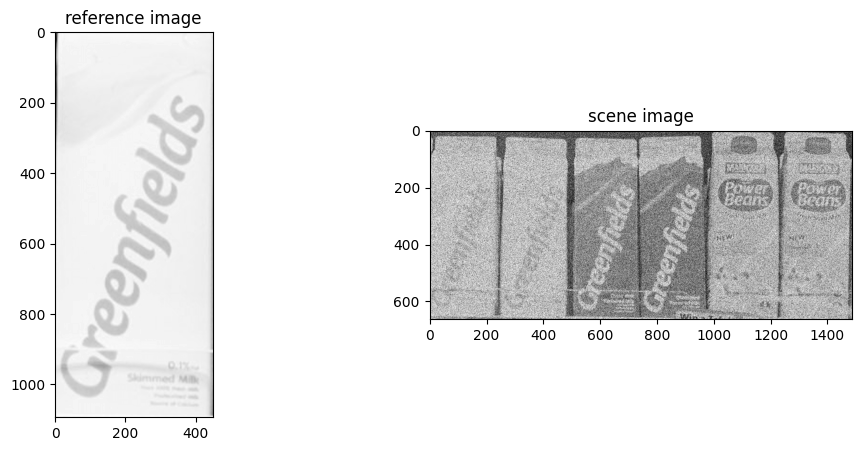

In [38]:
# @title Conversion to grayscale
ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)
gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(ref, cmap = "gray")
ax[0].set_title("reference image")
ax[1].imshow(gray_scene, cmap = "gray")
ax[1].set_title("scene image")
plt.show()

In [45]:
# @title Denoise function
def denoise_image(noisy_img):
  return cv2.bilateralFilter(cv2.medianBlur(noisy_img, ksize=5), d = 7, sigmaColor=75, sigmaSpace=75)
  #return cv2.fastNlMeansDenoising(noisy_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

In [43]:
# @title Computing keypoints through SIFT descriptor
sift = cv2.xfeatures2d.SIFT_create()

def sift_detect_and_visualize(image):
  kp_image, des_image = sift.detectAndCompute(image, None)
  image_with_kp = cv2.drawKeypoints(image, kp_image, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  return kp_image, des_image, image_with_kp

# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect and compute keypoints for both ref and scene images
kp_ref, descriptor_ref = sift.detectAndCompute(ref, None)
kp_scene, descriptor_scene = sift.detectAndCompute(denoise_image(gray_scene), None)

len good matches: 5

Found 0 instances
No matches found or bounding box is too small, displaying the original scene image.


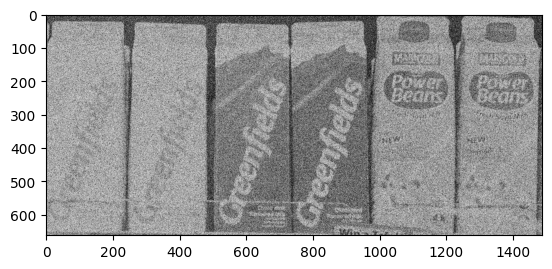

In [44]:
#@title Feature matching for multiple instances
def template_matching_Zncc(img_train, template):
    """
    Perform template matching using Zero-mean Normalized Cross-Correlation (ZNCC).
    :param img_train: The image where the template is to be matched.
    :param template: The template image.
    :return: The maximum value of ZNCC.
    """
    result = cv2.matchTemplate(img_train, template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, _ = cv2.minMaxLoc(result)
    return max_val

def feature_matcher_B(ref_img, kp_ref, kp_scene, des_ref, des_scene, scene,
                      min_match_count=20, dist_ratio=0.8, flann_index_kdtree=1, num_checks=50,
                      min_max_val=0.4, min_match_mask_count=10, min_bbox_size=(30, 30)):

    # Defining parameters for algorithm
    index_params = dict(algorithm=flann_index_kdtree, trees=5)
    search_params = dict(checks=num_checks)

    # Initializing matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # KNN problem: matching and finding the 2 closest elements for each query descriptor
    matches = flann.knnMatch(des_ref, des_scene, k=2)

    # Filter only good matches
    good_matches = [m for m, n in matches if m.distance < dist_ratio * n.distance]

    # Initialize variables to avoid Unbound errors
    img_color_bbox = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)  # Convert grayscale scene to BGR

    # Boolean var to check if there is a matching
    match_bool = False

    # Init to avoid unbound errors
    matchesMask = []

    # Counter of detected instances
    num_instances = 0

    print(f"len good matches: {len(good_matches)}")

    # Start loop until matches are enough
    while len(good_matches) > min_match_count:
        # Building the correspondences arrays of good matches
        src_pts = np.float32([kp_ref[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        try:
            # Using RANSAC to estimate a robust homography
            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            if M is None:
                print("Homography failed. No valid transformation could be found.")
                break

            # Mask of discarded points used in visualization
            matchesMask = mask.ravel().tolist()

            # Additional check to ensure that enough homography matches (inliers)
            if sum(matchesMask) < min_match_mask_count:
              break

            # Corners of the query image
            h, w = ref_img.shape
            pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

            # Apply the homography matrix: project the corners into the train image
            dst = cv2.perspectiveTransform(pts, M)

            # Calculate the bounding rectangle positions
            dst_int = np.int32(dst)
            x, y, w_d, h_d = cv2.boundingRect(dst_int)

            # Check if the bounding box is too small
            if w_d < min_bbox_size[0] or h_d < min_bbox_size[1]:
                print(f"Bounding box is too small: ({w_d}px x {h_d}px), skipping.")
                break

            # Drawing the bounding box on the colored scene image
            img_color_bbox = cv2.polylines(img_color_bbox, [dst_int], True, (0, 255, 0), 12, cv2.LINE_AA)  # Fixed green bounding box color

            # Center of the bounding box
            x_center_bbox = x + w_d / 2
            y_center_bbox = y + h_d / 2
            pos_bbox = np.array([x_center_bbox, y_center_bbox])
            print("Bounding box | Position: ({:.0f}, {:.0f}) - Height: {:.0f}px - Width: {:.0f}px".format(
                pos_bbox[0], pos_bbox[1], h_d, w_d))

            # Resize the reference image based on the bounding box size
            resized_image = cv2.resize(ref_img, (w_d, h_d), interpolation=cv2.INTER_LINEAR)

            # Template matching: further check
            max_val = template_matching_Zncc(scene, resized_image)
            print("Template matching max value: {:.3f}".format(max_val))

            if max_val >= min_max_val:
                match_bool = True
                num_instances += 1
            else:
                match_bool = False

            # Remove the inliers from good_matches effectively
            good_matches = [m for i, m in enumerate(good_matches) if not matchesMask[i]]

        except cv2.error as e:
            print(f"Error occurred during homography computation: {e}")
            break

    return img_color_bbox, match_bool, matchesMask, good_matches, num_instances

scene_bbox, match_bool, matchesMask, good_matches, num_instances = feature_matcher_B(
    ref, kp_ref, kp_scene, descriptor_ref, descriptor_scene, denoise_image(gray_scene),
    min_bbox_size=(30, 30))

print(f"\nFound {num_instances} instances")

# Display the image with bounding boxes
if match_bool:
    plt.imshow(cv2.cvtColor(scene_bbox, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
else:
    print("No matches found or bounding box is too small, displaying the original scene image.")
    plt.imshow(cv2.cvtColor(denoise_image(gray_scene), cv2.COLOR_GRAY2RGB))

plt.show()


Processing Reference Image: ref15


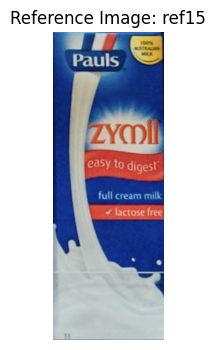


Matching with Scene: scene6
len good matches: 84
Bounding box | Position: (583, 622) - Height: 908px - Width: 324px
Template matching max value: 0.942
Bounding box | Position: (189, 616) - Height: 901px - Width: 338px
Template matching max value: 0.938


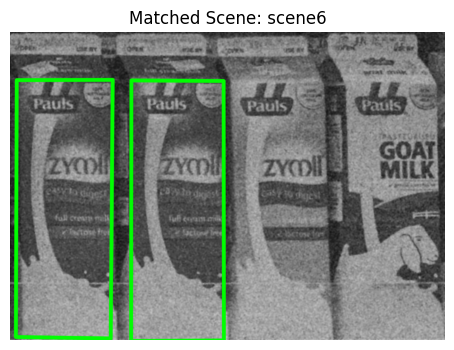


Matching with Scene: scene7
len good matches: 26

Matching with Scene: scene8
len good matches: 9

Matching with Scene: scene9
len good matches: 35

Matching with Scene: scene10
len good matches: 14

Matching with Scene: scene11
len good matches: 13

Matching with Scene: scene12
len good matches: 11

Summary for 'ref15':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene6 (x2)

Processing Reference Image: ref16


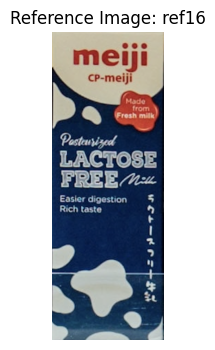


Matching with Scene: scene6
len good matches: 45

Matching with Scene: scene7
len good matches: 174
Bounding box | Position: (794, 462) - Height: 605px - Width: 216px
Template matching max value: 0.931
Bounding box | Position: (1030, 462) - Height: 607px - Width: 231px
Template matching max value: 0.826


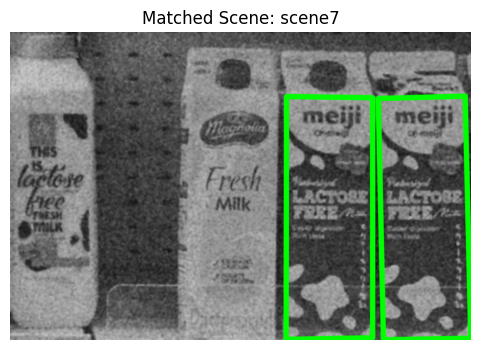


Matching with Scene: scene8
len good matches: 42
Bounding box is too small: (2px x 1px), skipping.

Matching with Scene: scene9
len good matches: 47
Bounding box is too small: (6px x 5px), skipping.

Matching with Scene: scene10
len good matches: 36

Matching with Scene: scene11
len good matches: 35

Matching with Scene: scene12
len good matches: 37

Summary for 'ref16':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene7 (x2)

Processing Reference Image: ref17


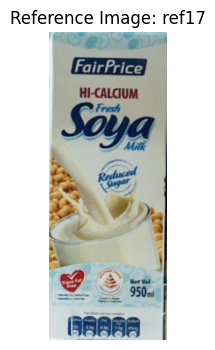


Matching with Scene: scene6
len good matches: 31

Matching with Scene: scene7
len good matches: 45

Matching with Scene: scene8
len good matches: 188
Bounding box | Position: (648, 568) - Height: 855px - Width: 329px
Template matching max value: 0.927
Bounding box | Position: (988, 576) - Height: 857px - Width: 324px
Template matching max value: 0.927
Bounding box | Position: (1342, 576) - Height: 859px - Width: 333px
Template matching max value: 0.882


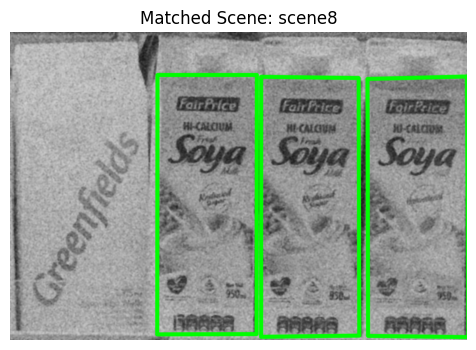


Matching with Scene: scene9
len good matches: 43

Matching with Scene: scene10
len good matches: 31

Matching with Scene: scene11
len good matches: 68
Bounding box | Position: (166, 362) - Height: 483px - Width: 187px
Template matching max value: 0.871


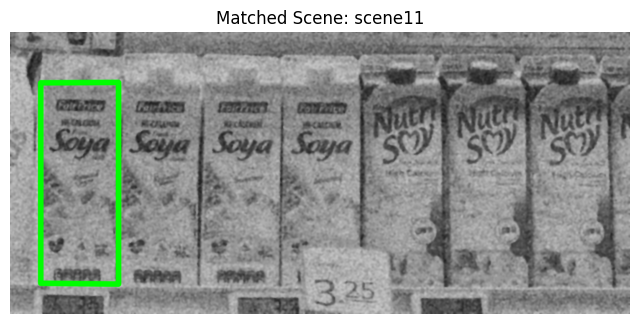


Matching with Scene: scene12
len good matches: 26

Summary for 'ref17':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       4 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       3 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene8 (x2), scene11 (x1)

Processing Reference Image: ref18


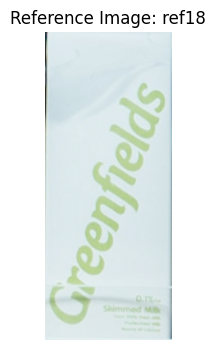


Matching with Scene: scene6
len good matches: 1

Matching with Scene: scene7
len good matches: 3

Matching with Scene: scene8
len good matches: 31
Bounding box | Position: (257, 580) - Height: 819px - Width: 410px
Template matching max value: 0.261

Matching with Scene: scene9
len good matches: 6

Matching with Scene: scene10
len good matches: 3

Matching with Scene: scene11
len good matches: 1

Matching with Scene: scene12
len good matches: 36
Bounding box | Position: (405, 404) - Height: 601px - Width: 252px
Template matching max value: 0.635


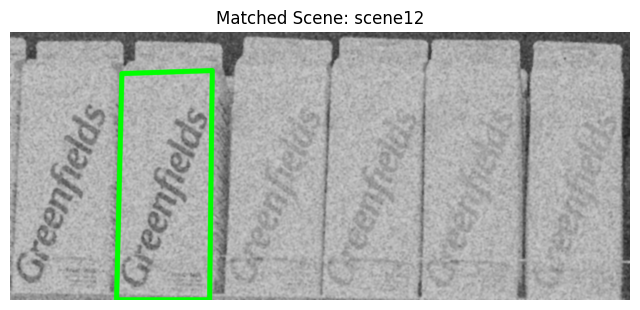


Summary for 'ref18':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       1 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       1 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       2 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene9 (x0), scene12 (x1)

Processing Reference Image: ref19


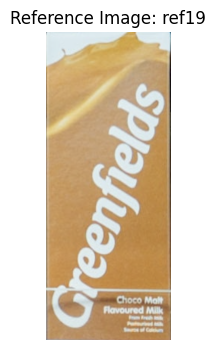


Matching with Scene: scene6
len good matches: 14

Matching with Scene: scene7
len good matches: 26

Matching with Scene: scene8
len good matches: 16

Matching with Scene: scene9
len good matches: 71
Bounding box | Position: (849, 378) - Height: 571px - Width: 220px
Template matching max value: 0.794
Bounding box | Position: (620, 376) - Height: 557px - Width: 227px
Template matching max value: 0.891


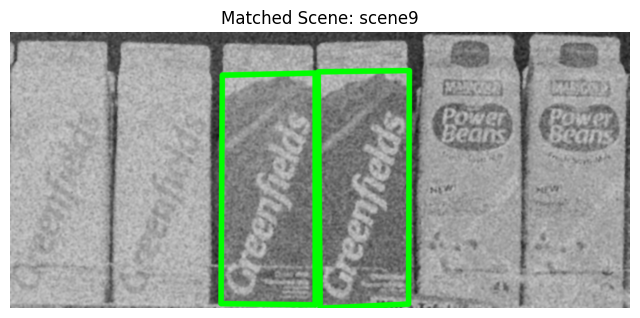


Matching with Scene: scene10
len good matches: 10

Matching with Scene: scene11
len good matches: 11

Matching with Scene: scene12
len good matches: 8

Summary for 'ref19':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene9 (x2)

Processing Reference Image: ref20


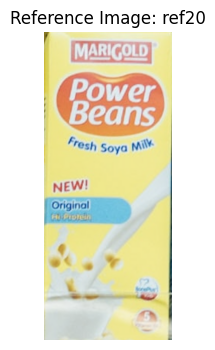


Matching with Scene: scene6
len good matches: 20

Matching with Scene: scene7
len good matches: 26

Matching with Scene: scene8
len good matches: 16

Matching with Scene: scene9
len good matches: 55
Bounding box | Position: (1103, 360) - Height: 532px - Width: 236px
Template matching max value: 0.647
Bounding box | Position: (1358, 385) - Height: 574px - Width: 233px
Template matching max value: 0.575


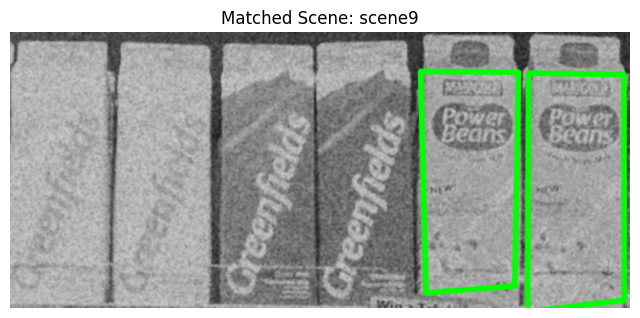


Matching with Scene: scene10
len good matches: 52
Bounding box | Position: (80, 1008) - Height: 617px - Width: 494px
Template matching max value: 0.194

Matching with Scene: scene11
len good matches: 13

Matching with Scene: scene12
len good matches: 6

Summary for 'ref20':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene9 (x2)

Processing Reference Image: ref21


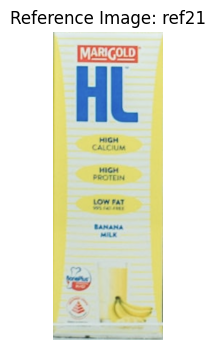


Matching with Scene: scene6
len good matches: 33

Matching with Scene: scene7
len good matches: 22

Matching with Scene: scene8
len good matches: 18

Matching with Scene: scene9
len good matches: 23

Matching with Scene: scene10
len good matches: 49
Bounding box | Position: (984, 538) - Height: 694px - Width: 250px
Template matching max value: 0.850
Bounding box | Position: (1529, 539) - Height: 700px - Width: 250px
Template matching max value: 0.867


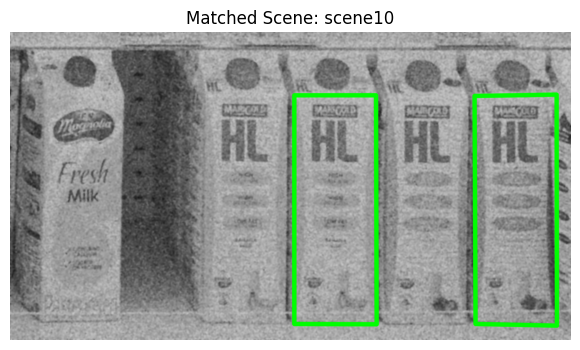


Matching with Scene: scene11
len good matches: 28

Matching with Scene: scene12
len good matches: 20

Summary for 'ref21':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene10 (x2)

Processing Reference Image: ref22


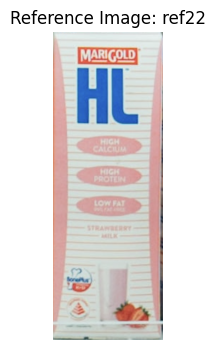


Matching with Scene: scene6
len good matches: 15

Matching with Scene: scene7
len good matches: 28

Matching with Scene: scene8
len good matches: 18

Matching with Scene: scene9
len good matches: 21

Matching with Scene: scene10
len good matches: 47
Bounding box | Position: (1262, 538) - Height: 705px - Width: 250px
Template matching max value: 0.866


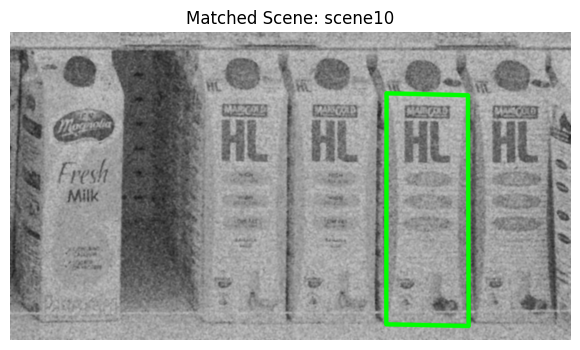


Matching with Scene: scene11
len good matches: 36
Bounding box is too small: (4px x 4px), skipping.

Matching with Scene: scene12
len good matches: 13

Summary for 'ref22':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       1 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       1 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene10 (x1)

Processing Reference Image: ref23


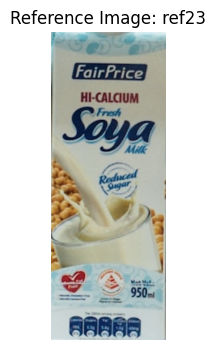


Matching with Scene: scene6
len good matches: 43

Matching with Scene: scene7
len good matches: 50

Matching with Scene: scene8
len good matches: 196
Bounding box | Position: (988, 567) - Height: 872px - Width: 321px
Template matching max value: 0.929
Bounding box | Position: (647, 566) - Height: 881px - Width: 326px
Template matching max value: 0.859
Bounding box | Position: (1342, 570) - Height: 869px - Width: 328px
Template matching max value: 0.914


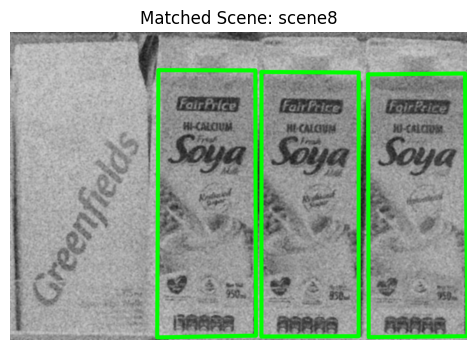


Matching with Scene: scene9
len good matches: 44

Matching with Scene: scene10
len good matches: 30

Matching with Scene: scene11
len good matches: 71
Bounding box | Position: (166, 360) - Height: 498px - Width: 182px
Template matching max value: 0.828


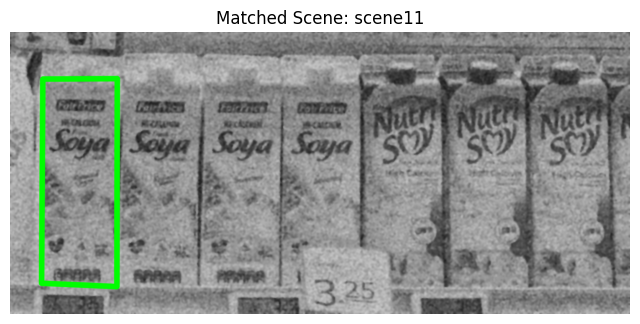


Matching with Scene: scene12
len good matches: 32

Summary for 'ref23':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       4 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       3 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene8 (x2), scene11 (x1)

Processing Reference Image: ref24


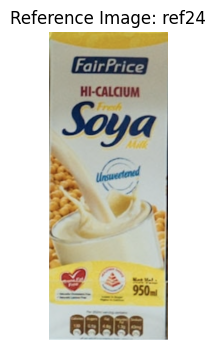


Matching with Scene: scene6
len good matches: 38

Matching with Scene: scene7
len good matches: 34

Matching with Scene: scene8
len good matches: 155
Bounding box | Position: (644, 572) - Height: 859px - Width: 331px
Template matching max value: 0.902
Bounding box | Position: (1338, 580) - Height: 854px - Width: 329px
Template matching max value: 0.935
Bounding box | Position: (986, 576) - Height: 857px - Width: 329px
Template matching max value: 0.922


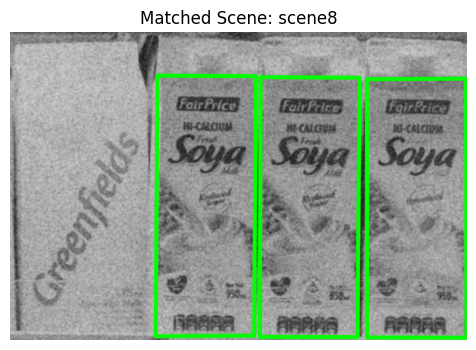


Matching with Scene: scene9
len good matches: 29

Matching with Scene: scene10
len good matches: 20

Matching with Scene: scene11
len good matches: 49
Bounding box | Position: (555, 367) - Height: 484px - Width: 188px
Template matching max value: 0.858


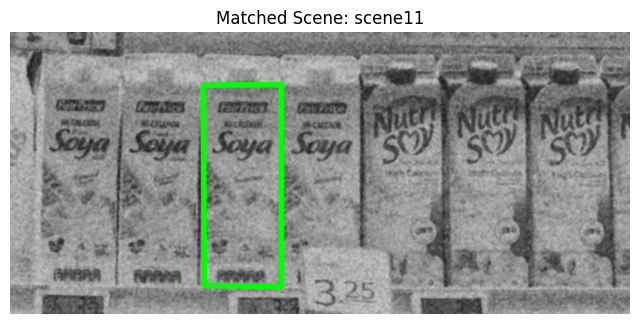


Matching with Scene: scene12
len good matches: 31

Summary for 'ref24':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       4 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene8 (x1), scene11 (x1)

Processing Reference Image: ref25


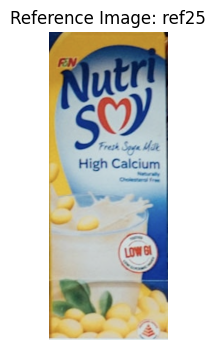


Matching with Scene: scene6
len good matches: 21

Matching with Scene: scene7
len good matches: 17

Matching with Scene: scene8
len good matches: 21

Matching with Scene: scene9
len good matches: 17

Matching with Scene: scene10
len good matches: 13

Matching with Scene: scene11
len good matches: 58
Bounding box | Position: (1142, 370) - Height: 481px - Width: 193px
Template matching max value: 0.884
Bounding box | Position: (1342, 373) - Height: 486px - Width: 191px
Template matching max value: 0.890


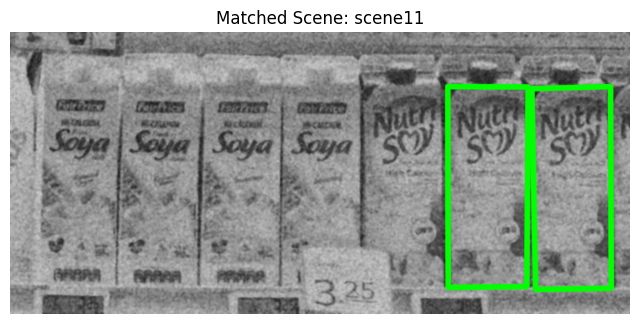


Matching with Scene: scene12
len good matches: 16

Summary for 'ref25':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene11 (x2)

Processing Reference Image: ref26


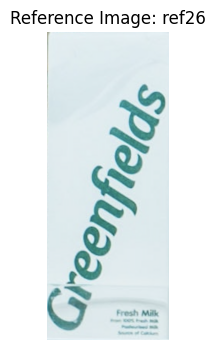


Matching with Scene: scene6
len good matches: 16

Matching with Scene: scene7
len good matches: 19

Matching with Scene: scene8
len good matches: 45
Bounding box | Position: (258, 578) - Height: 833px - Width: 379px
Template matching max value: 0.362

Matching with Scene: scene9
len good matches: 19

Matching with Scene: scene10
len good matches: 19

Matching with Scene: scene11
len good matches: 19

Matching with Scene: scene12
len good matches: 60
Bounding box | Position: (137, 390) - Height: 595px - Width: 244px
Template matching max value: 0.803
Bounding box | Position: (408, 402) - Height: 597px - Width: 233px
Template matching max value: 0.860


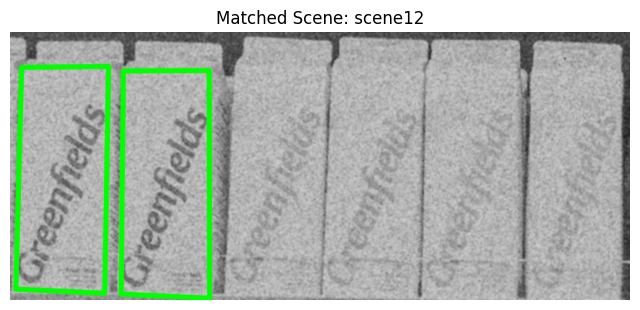


Summary for 'ref26':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       1 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene8 (x0), scene12 (x2)

Processing Reference Image: ref27


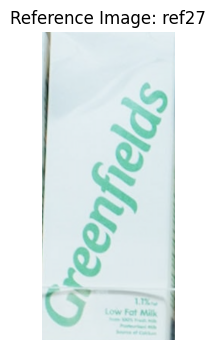


Matching with Scene: scene6
len good matches: 7

Matching with Scene: scene7
len good matches: 7

Matching with Scene: scene8
len good matches: 41
Bounding box | Position: (260, 584) - Height: 817px - Width: 396px
Template matching max value: 0.303

Matching with Scene: scene9
len good matches: 10

Matching with Scene: scene10
len good matches: 3

Matching with Scene: scene11
len good matches: 5

Matching with Scene: scene12
len good matches: 44
Bounding box | Position: (407, 400) - Height: 597px - Width: 244px
Template matching max value: 0.669
Bounding box | Position: (135, 390) - Height: 593px - Width: 262px
Template matching max value: 0.649


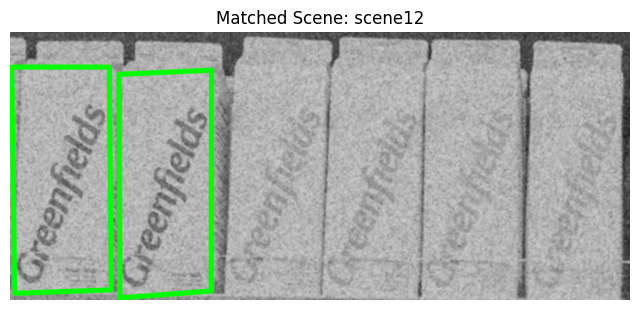


Summary for 'ref27':
╒════════════════════════╤═════════╕
│ Metric                 │   Count │
╞════════════════════════╪═════════╡
│ Total Matched Scenes   │       2 │
├────────────────────────┼─────────┤
│ Correct Matches (TP)   │       2 │
├────────────────────────┼─────────┤
│ Incorrect Matches (FP) │       0 │
├────────────────────────┼─────────┤
│ Missed Matches (FN)    │       0 │
╘════════════════════════╧═════════╛

Correctly Matched Scenes: scene12 (x2)

Overall System Performance
Precision: 1.00
Recall: 1.00
Accuracy: 1.00


In [46]:
# @title Instance Detection System
from natsort import natsorted
from tabulate import tabulate

# Ground truth correspondences and n° of occurrences
ground_truth = {
    "ref15": {"scene6": 2},
    "ref16": {"scene7": 2},
    "ref17": {"scene8": 2, "scene11": 2},
    "ref18": {"scene9": 2, "scene12": 2},
    "ref19": {"scene9": 2},
    "ref20": {"scene9": 2},
    "ref21": {"scene10": 2},
    "ref22": {"scene10": 2},
    "ref23": {"scene8": 2, "scene11": 2},  # Same as ref17
    "ref24": {"scene8": 1, "scene11": 2},
    "ref25": {"scene11": 3},
    "ref26": {"scene8": 1, "scene12": 2},
    "ref27": {"scene12": 2}
}

# Initialize counters for True Positives, False Positives, and False Negatives
TP = 0
FP = 0
total_FN = 0  # Overall False Negatives counter

# Load reference and scene images
references = natsorted(os.listdir("models"))[14:]
scenes = natsorted(os.listdir("scenes"))[5:]

# Main loop through the reference images
for ref_filename in references:
    ref_name = ref_filename.replace('.png', '')
    print(f"\n{'='*60}\nProcessing Reference Image: {ref_name}\n{'='*60}")

    # Load and display the reference image
    ref = cv2.imread(os.path.join("models", ref_filename), 1)
    ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
    ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    plt.figure(figsize=(8, 4))
    plt.title(f"Reference Image: {ref_name}")
    plt.imshow(ref_color)
    plt.axis('off')
    plt.show()

    # SIFT initialization and keypoint detection
    sift = cv2.SIFT_create()
    kp_ref = sift.detect(ref)

    scenes_matched_dict = {}  # Dictionary to store matched scenes and their counts

    # Loop through scenes
    for scene_filename in scenes:
        scene_name = scene_filename.replace('.png', '')
        print(f"\nMatching with Scene: {scene_name}")

        # Load scene image
        scene = cv2.imread(os.path.join("scenes", scene_filename), 1)
        scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
        gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)
        denoised_scene = denoise_image(gray_scene)

        # Keypoint detection and description
        kp_scene = sift.detect(denoised_scene)
        kp_ref, descriptor_ref = sift.compute(ref, kp_ref)
        kp_scene, descriptor_scene = sift.compute(denoised_scene, kp_scene)

        # Feature matching
        scene_bbox, match_bool, matchesMask, good_matches, num_instances = feature_matcher_B(
            ref, kp_ref, kp_scene, descriptor_ref, descriptor_scene, denoised_scene,
            min_match_count=25, min_max_val=0.4, min_bbox_size=(30, 30)
        )

        if match_bool and num_instances > 0:
            scenes_matched_dict[scene_name] = num_instances

            # Display the scene with bounding box
            plt.figure(figsize=(8, 4))
            plt.title(f"Matched Scene: {scene_name}")
            plt.imshow(scene_bbox, cmap="gray")
            plt.axis('off')
            plt.show()

    # Reset FN for the current reference image
    FN = 0

    # Compare matched scenes with ground truth
    true_scenes = ground_truth.get(ref_name, {})
    correct_matches = {scene: min(scenes_matched_dict.get(scene, 0), count)
                       for scene, count in true_scenes.items()}
    incorrect_matches = {scene: count for scene, count in scenes_matched_dict.items()
                         if scene not in true_scenes}

    TP += sum(correct_matches.values())
    FP += sum(incorrect_matches.values())
    FN += sum(count for scene, count in true_scenes.items()
              if scene not in scenes_matched_dict)

    total_FN += FN  # Add the FN for this reference image to the total FN


    # Print the results for the current reference image
    print(f"\nSummary for '{ref_name}':")
    print(tabulate([
        ["Total Matched Scenes", sum(scenes_matched_dict.values())],
        ["Correct Matches (TP)", sum(correct_matches.values())],
        ["Incorrect Matches (FP)", sum(incorrect_matches.values())],
        ["Missed Matches (FN)", FN],
    ], headers=["Metric", "Count"], tablefmt="fancy_grid"))

    if correct_matches:
        print(f"\n\033[92mCorrectly Matched Scenes: {', '.join(f'{scene} (x{count})' for scene, count in correct_matches.items())}\033[0m")
    if incorrect_matches:
        print(f"\n\033[91mIncorrectly Matched Scenes: {', '.join(f'{scene} (x{count})' for scene, count in incorrect_matches.items())}\033[0m")

# Calculate Precision, Recall, and Accuracy
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
accuracy = (precision + recall) / 2

print(f"\n{'='*60}\nOverall System Performance\n{'='*60}")
print(f"Precision: \033[94m{precision:.2f}\033[0m")
print(f"Recall: \033[94m{recall:.2f}\033[0m")
print(f"Accuracy: \033[94m{accuracy:.2f}\033[0m")